In [37]:

import warnings
warnings.filterwarnings('ignore')


In [38]:
SEED = 123

In [39]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [40]:
df = pd.read_csv('vehicle-1.csv')

In [41]:
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [42]:
df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

In [43]:
df.shape

(846, 19)

In [44]:
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [45]:
df.dropna(inplace = True)

In [46]:
df.shape

(813, 19)

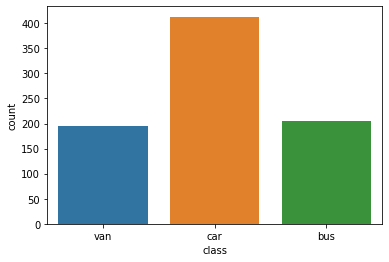

In [47]:
sns.countplot(x='class',     
           data=df)
plt.show()

In [48]:
vc = df['class'].value_counts().reset_index(name='count')
vc.rename(columns = {'index':'vehicle'},
         inplace=True)

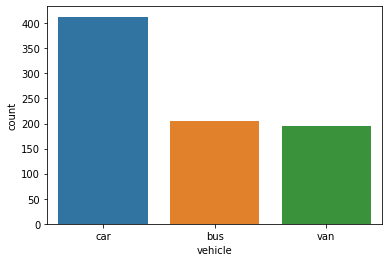

In [49]:
sns.barplot(x='vehicle',
             y = 'count',
             data=vc)
plt.show()

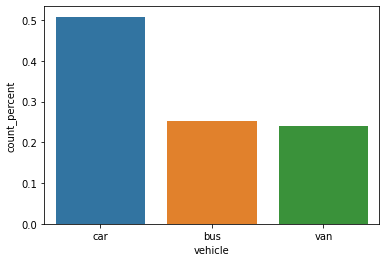

In [50]:
vc = df['class'].value_counts(normalize=True).reset_index(name='count_percent')
vc.rename(columns = {'index':'vehicle'},
         inplace=True)

sns.barplot(x='vehicle',
             y = 'count_percent',
             data=vc)
plt.show()

In [51]:
X = df.drop('class', axis=1)

In [52]:
std = X.std().sort_values()
zero_variance_features = std[std == 0].index.tolist()
len(zero_variance_features)

0

In [53]:
if zero_variance_features:
    X.drop(columns=zero_variance_features,
          inplace=True)
    print(f"Zero Variance features dropped")

#### Standardize the data

In [54]:
X = (X - X.mean()) / X.std()

In [55]:
X = X.values #converting to numpy array

In [56]:
from scipy.spatial.distance import pdist
from scipy.stats import pearsonr
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from sklearn.metrics import accuracy_score

In [57]:
Z = linkage(X[0:5],
            method = 'ward',
            metric='euclidean')
Z.shape

(4, 4)

In [58]:
0,1,2,3,4

(0, 1, 2, 3, 4)

In [59]:
Z

array([[ 1.        ,  3.        ,  2.79919221,  2.        ],
       [ 0.        ,  5.        ,  3.73585146,  3.        ],
       [ 2.        ,  6.        ,  6.52041096,  4.        ],
       [ 4.        ,  7.        , 17.08039185,  5.        ]])

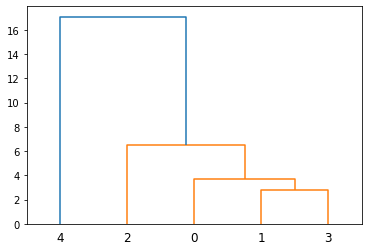

In [60]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=40,
)
plt.show()

In [61]:
Z = linkage(X,
            method = 'average',
            metric = 'euclidean')

Refer to "Cophenetic - explanation" notebook for finding ideal method and metric

In [62]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from collections import Counter
from scipy.cluster.hierarchy import fcluster

In [63]:
#
from sklearn.cluster import AgglomerativeClustering

In [64]:
ac_cluster = AgglomerativeClustering(n_clusters=2,
                                    linkage='ward',
                                    affinity='euclidean')
cluster_labels = ac_cluster.fit_predict(X)
silhouette_avg = silhouette_score(X, cluster_labels)
silhouette_avg

0.3820619550404833

In [65]:
cluster_df = pd.DataFrame({
    "predicted": cluster_labels,
    "actual": df['class'].values
})
pd.crosstab(index=cluster_df['predicted'],
           columns=cluster_df['actual']
           )

actual,bus,car,van
predicted,,,
0,152,190,189
1,53,223,6


In [66]:
for i in range(2,10):
    ac_cluster = AgglomerativeClustering(n_clusters=i,
                                    linkage='average',
                                    affinity='euclidean')
    cluster_labels = ac_cluster.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"cluster size: {i} : {silhouette_avg}")

cluster size: 2 : 0.6141367567505789
cluster size: 3 : 0.5961122321298461
cluster size: 4 : 0.39568231292315553
cluster size: 5 : 0.27695389087585065
cluster size: 6 : 0.27684417023193825
cluster size: 7 : 0.23196490954748034
cluster size: 8 : 0.23255047463073303
cluster size: 9 : 0.22527255629102622


In [67]:
from sklearn.cluster import KMeans
clusterer = KMeans(n_clusters=2,
                   random_state=SEED)
cluster_labels = clusterer.fit_predict(X)
silhouette_avg = silhouette_score(X, cluster_labels)
silhouette_avg

0.3897884797514885

In [68]:
from sklearn.cluster import KMeans
clusterer = KMeans(n_clusters=3,
                   random_state=SEED)
cluster_labels = clusterer.fit_predict(X)
silhouette_avg = silhouette_score(X, cluster_labels)
silhouette_avg

0.2904150212788517

In [69]:
ac_cluster = AgglomerativeClustering(n_clusters=3,
                                    linkage='ward',
                                    affinity='euclidean')
cluster_labels = ac_cluster.fit_predict(X)
Counter(cluster_labels)

Counter({1: 358, 0: 282, 2: 173})

In [70]:
min_size_of_the_cluster = 173/813

In [71]:
len(X)

813

In [72]:
805/813, 7/813, 1/813 : min_size_of_the_cluster = 1/813

SyntaxError: only single target (not tuple) can be annotated (<ipython-input-72-1c32b8904a76>, line 1)

In [ ]:
ac_cluster = AgglomerativeClustering(n_clusters=3,
                                    linkage='average',
                                    affinity='euclidean')
cluster_labels = ac_cluster.fit_predict(X)
Counter(cluster_labels)

In [ ]:
ac_cluster = AgglomerativeClustering(n_clusters=3,
                                    linkage='ward',
                                    affinity='euclidean')
cluster_labels = ac_cluster.fit_predict(X)
    
cluster_df = pd.DataFrame({
    "predicted": cluster_labels,
    "actual": df['class'].values
    })
pd.crosstab(index=cluster_df['predicted'],
           columns=cluster_df['actual']
           )

In [ ]:
df.corr()

In [ ]:
df.head()

In [ ]:
mapping = {0:"car",
          1:"van",
          2:"bus"}
cluster_df['predicted_map'] = cluster_df['predicted'].map(mapping)
accuracy_score(cluster_df['actual'],
               cluster_df['predicted_map'])

- Do K-Means Clustering as well
- Compare with K-means based on Silehoutte Score and Actual Classification
- Do it with Sklearn
- https://towardsdatascience.com/understanding-the-concept-of-hierarchical-clustering-technique-c6e8243758ec

- For large scale data, always use K-Means
- For small scale, you may try both
- Mostly you would see only K-Means being used

- 2 Important points

** Sometime implementing model is not feasible

- Prime Day example - Price discrimnation - Politically correct. 
- Uber charging different price: Uproar (GPS use)
- Hotel pricing [cant discriminate between customers]
- Offline stores; same policy for all



- Exception: Different lending rates; lending amount

** Product can be made only in limited number of ways


- Advertising creation
- TV shows; Card, Advertisement

- Image compression